# Data Analysis

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [341]:
df = pd.read_csv('flight.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [342]:
df.shape

(300153, 12)

In [343]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [344]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [346]:
df.drop(['Unnamed: 0','flight'], axis = 1, inplace = True)
df.drop(['duration'], axis = 1, inplace = True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


<Axes: xlabel='airline'>

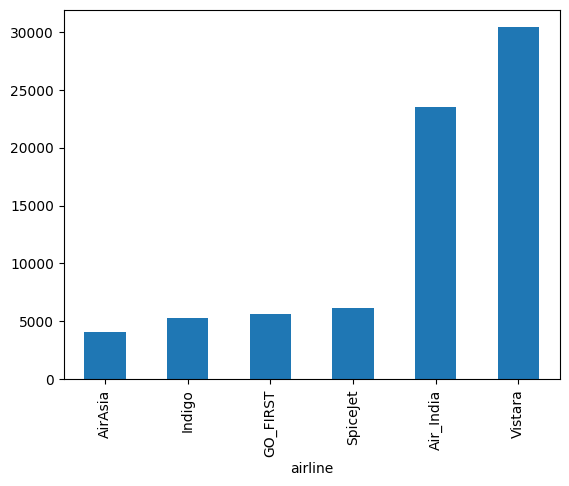

In [347]:
df.groupby('airline')['price'].mean().sort_values().plot(kind = 'bar')

Obesrvation : Vistara has higest ticket prices in compare to other Airlines.

In [348]:
airline_val = df.airline.value_counts().values
airline_names = df.airline.value_counts().index

([<matplotlib.patches.Wedge at 0x7a273e9e7250>,
 [Text(0.25349753295603505, 1.0703919846417032, 'Vistara'),
  Text(-1.0208842029294103, -0.40962842212080813, 'Air_India'),
  Text(0.11941632826577686, -1.0934988525570204, 'Indigo'),
  Text(0.7911114347046972, -0.7642922856338901, 'GO_FIRST'),
  Text(1.030597559322457, -0.3845369562455535, 'AirAsia'),
  Text(1.095111212714227, -0.10359262419484844, 'SpiceJet')],
 [Text(0.13827138161238273, 0.5838501734409289, '42.60%'),
  Text(-0.5568459288705874, -0.22343368479316805, '26.95%'),
  Text(0.06513617905406009, -0.5964539195765566, '14.37%'),
  Text(0.4315153280207439, -0.41688670125484906, '7.72%'),
  Text(0.5621441232667946, -0.2097474306793928, '5.36%'),
  Text(0.5973333887532147, -0.0565050677426446, '3.00%')])

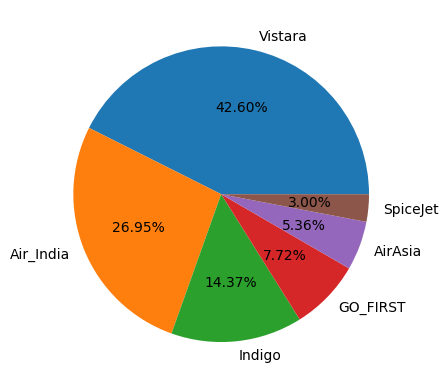

In [349]:
plt.pie(airline_val, labels=airline_names, autopct='%1.2f%%')

Observation : Most people use Vistara for their journey.

In [350]:
df.rename(columns={'class': 'flying_class'}, inplace=True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flying_class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


In [351]:
class_values = df.flying_class.value_counts().values
class_labels = df.flying_class.value_counts().index

([<matplotlib.patches.Wedge at 0x7a273e959650>,
 [Text(-0.6140993999298546, 0.9126236502555655, 'Economy'),
  Text(0.614099479713949, -0.9126235965692853, 'Business')],
 [Text(-0.334963309052648, 0.49779471832121747, '68.85%'),
  Text(0.3349633525712448, -0.4977946890377919, '31.15%')])

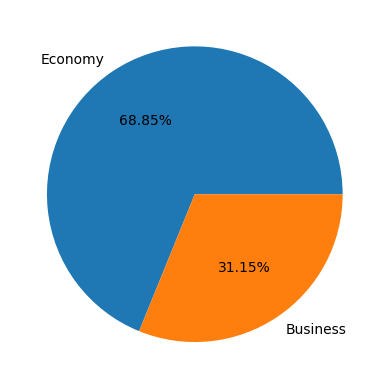

In [352]:
plt.pie(class_values, labels = class_labels, autopct='%1.2f%%')

Observation : A greater number of people travel in Economy class compared to Business class.

In [353]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

Observation : Travelling from Chennai costs more.

<Axes: xlabel='source_city'>

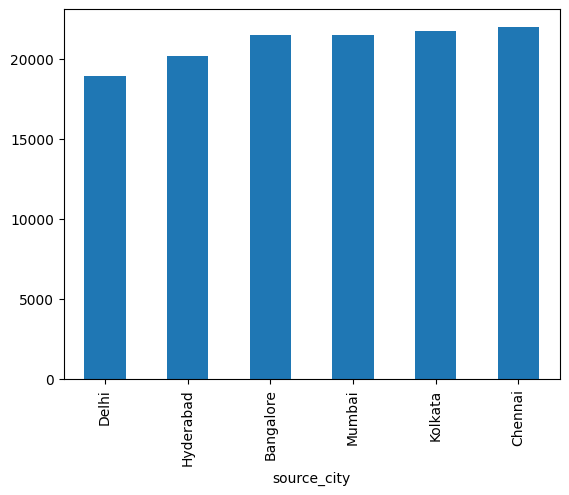

In [354]:
df.groupby('source_city')['price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='price', ylabel='airline'>

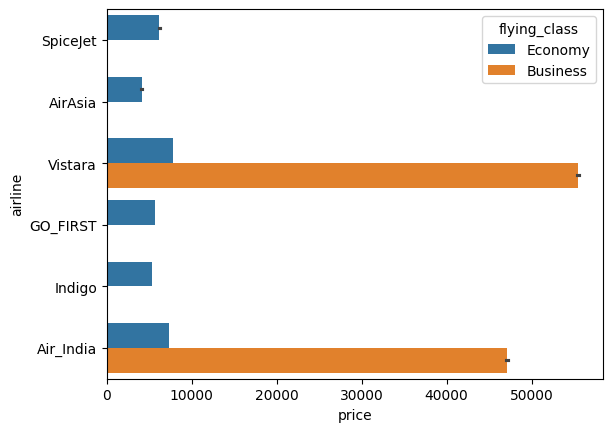

In [355]:
sns.barplot(x = 'price', y = 'airline', hue = 'flying_class', data = df)

([<matplotlib.patches.Wedge at 0x7a273e826b50>,
 [Text(0.8088506368673685, 0.745493559488781, 'Morning'),
  Text(-0.6369784773133381, 0.8968045603360754, 'Early_Morning'),
  Text(-1.0011156661300464, -0.45581511935102986, 'Evening'),
  Text(0.044446299499032435, -1.0991016906823692, 'Night'),
  Text(0.9504301509164296, -0.5537892453171811, 'Afternoon'),
  Text(1.0998972339906912, -0.015035779315580096, 'Late_Night')],
 [Text(0.44119125647311, 0.4066328506302442, '23.70%'),
  Text(-0.34744280580727527, 0.4891661238196774, '22.25%'),
  Text(-0.5460630906163889, -0.24862642873692536, '21.69%'),
  Text(0.024243436090381324, -0.599510013099474, '16.00%'),
  Text(0.518416445954416, -0.30206686108209874, '15.92%'),
  Text(0.5999439458131043, -0.008201334172134596, '0.44%')])

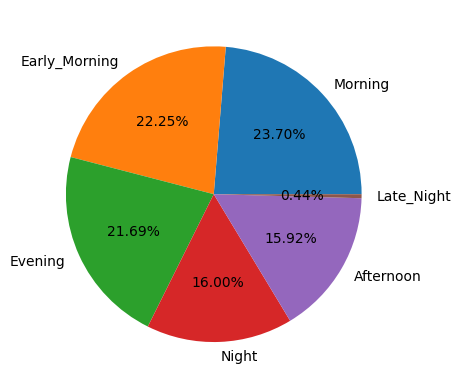

In [356]:
departure_time_values = df.departure_time.value_counts().values
departure_time_labels = df.departure_time.value_counts().index
plt.pie(departure_time_values, labels = departure_time_labels, autopct='%1.2f%%')

Observation: More people prefer to travel in Morning.

# Feature Engineering

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   flying_class      300153 non-null  object
 7   days_left         300153 non-null  int64 
 8   price             300153 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 20.6+ MB


In [358]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [359]:
df['airline'] = df['airline'].map({'AirAsia': 0, 'Indigo':1, 'GO_FIRST': 2, 'SpiceJet': 3, 'Air_India': 4, 'Vistara': 5})

In [360]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flying_class,days_left,price
0,3,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,3,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,0,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,5,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,5,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


In [361]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [362]:
df['source_city'] = df['source_city'].map({'Delhi': 0, 'Hyderabad': 1, 'Bangalore': 2, 'Mumbai': 3, 'Kolkata': 4, 'Chennai': 5})

In [363]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [364]:
df['destination_city'] = df['destination_city'].map({'Delhi': 0, 'Hyderabad': 1, 'Mumbai': 2, 'Bangalore': 3, 'Chennai': 4, 'Kolkata': 5})

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  int64 
 1   source_city       300153 non-null  int64 
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  int64 
 6   flying_class      300153 non-null  object
 7   days_left         300153 non-null  int64 
 8   price             300153 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 20.6+ MB


In [366]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [367]:
df['departure_time'] = df['departure_time'].map({'Early_Morning': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late_Night': 5})

In [368]:
df['arrival_time'] = df['arrival_time'].map({'Early_Morning': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late_Night': 5})

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  int64 
 1   source_city       300153 non-null  int64 
 2   departure_time    300153 non-null  int64 
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  int64 
 5   destination_city  300153 non-null  int64 
 6   flying_class      300153 non-null  object
 7   days_left         300153 non-null  int64 
 8   price             300153 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 20.6+ MB


In [370]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [371]:
df['stops'] = df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})

In [372]:
df['flying_class'].unique()

array(['Economy', 'Business'], dtype=object)

In [373]:
df['flying_class'] = df['flying_class'].map({'Economy': 0, 'Business': 1})

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   airline           300153 non-null  int64
 1   source_city       300153 non-null  int64
 2   departure_time    300153 non-null  int64
 3   stops             300153 non-null  int64
 4   arrival_time      300153 non-null  int64
 5   destination_city  300153 non-null  int64
 6   flying_class      300153 non-null  int64
 7   days_left         300153 non-null  int64
 8   price             300153 non-null  int64
dtypes: int64(9)
memory usage: 20.6 MB


In [375]:
df.isnull().sum()

,0
airline,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
flying_class,0
days_left,0
price,0


# Model Training

In [376]:
X = df.drop('price', axis=1)
y = df['price']

In [377]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [378]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression

In [379]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [380]:
y_pred = lin_reg.predict(X_test)

In [381]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_linearReg = r2_score(y_test, y_pred)

print("Linear Regression RMSE:", rmse)
print("R²:", r2_linearReg)

Linear Regression RMSE: 6962.472511607886
R²: 0.9051940666251451


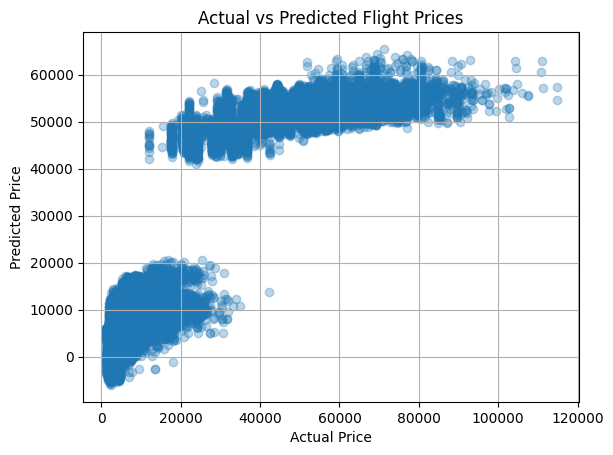

In [382]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.grid(True)
plt.show()

K-Nearest Neighbors (KNN)

In [383]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_knn = r2_score(y_test, y_pred)

print("KNN RMSE:", rmse)
print("R²:", r2_knn)

KNN RMSE: 4184.406199424208
R²: 0.9657566531471963


Gradient Boosting

In [384]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_gradient = r2_score(y_test, y_pred)

print("Gradient Boosting RMSE:", rmse)
print("R²:", r2_gradient)

Gradient Boosting RMSE: 4995.602104006272
R²: 0.9511927643376342


XGBoost

In [385]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_xgb = r2_score(y_test, y_pred)

print("XGBoost RMSE:", rmse)
print("R²:", r2_xgb)

XGBoost RMSE: 4320.36341064036
R²: 0.9634952545166016


XGBoost Regressor with Hyperparameter Tuning

In [386]:
from xgboost import XGBRegressor

xgb_tuning = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=10,
    cv=3, scoring='neg_root_mean_squared_error',
    n_jobs=-1, verbose=1, random_state=42
)

random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_
y_pred = best_xgb.predict(X_test)
r2_xgb_tuning = r2_score(y_test, y_pred)

print("XGBoost Best Params:", random_search_xgb.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_xgb_tuning)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
XGBoost Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
RMSE: 3868.3979888320696
R² Score: 0.9707335233688354


In [387]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Gradient Boosting', 'XGBoost', 'Gradient Boosting (Hyparameter Tuning)'],
    'Score': [r2_linearReg, r2_knn, r2_gradient, r2_xgb, r2_xgb_tuning]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Gradient Boosting (Hyparameter Tuning),0.970734
1,KNN,0.965757
3,XGBoost,0.963495
2,Gradient Boosting,0.951193
0,Linear Regression,0.905194


In [388]:
import pickle
model = best_xgb
pickle.dump(model, open('model.pkl', 'wb'))